In [134]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# import matplotlib.style as style
import numpy as np
import pandas as pd
import itertools
import json

# print(plt.style.available)
# style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid') # seaborn-darkgrid, seaborn-muted, seaborn-ticks, classic, seaborn-white, seaborn-whitegrid, bmh, fivethirtyeight
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 255)
pd.options.mode.chained_assignment = None

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']
marker = itertools.cycle(('D', 'o', 'h', '^', 's'))

%matplotlib inline

In [135]:
first_part = pd.DataFrame(json.load(open('../../benchmark-results-encrypt_load_embed_extractdata.json', 'r', encoding='utf8'))['benchmarks'])

# delete unnecessary columns
first_part.drop(
    labels=['run_type', 'repetitions', 'threads', 'run_name', 'cpu_time', 'time_unit', 'repetition_index'],
    axis=1,
    inplace=True
)
# Delete rows with medians and rows for each independent iteration
first_part = first_part[first_part['aggregate_name'].notna()]
first_part = first_part[~first_part.aggregate_name.str.contains("median")]
# first_part.tail(6)

### Process data for encryptor

In [136]:
encryptor_part = first_part[first_part.name.str.contains("Encryptor_Encrypt_.*_mean")]
encryptor_part.drop(labels=['iterations', 'aggregate_name', 'MaxEmbeddingRate', 'maxUserDataBits'], axis=1, inplace=True)
encryptor_part[:7]

,name,real_time
3,Encryptor_Encrypt_Airplane_512x512_bench_mean,3.174592
9,Encryptor_Encrypt_Crowd_512x512_bench_mean,3.012347
15,Encryptor_Encrypt_Man_512x512_bench_mean,2.970965
21,Encryptor_Encrypt_Boat_512x512_bench_mean,2.968447
27,Encryptor_Encrypt_Liberty_1024x1024_bench_mean,12.443089
33,Encryptor_Encrypt_Man_2048x2048_bench_mean,48.914976
39,Encryptor_Encrypt_Man_4096x4096_bench_mean,198.103911


### Plot spent time against image resolution

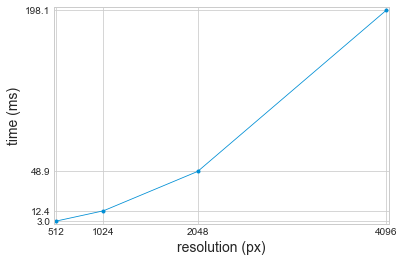

In [137]:
fig,ax = plt.subplots()
    
ax.plot([512, 1024, 2048, 4096], encryptor_part[3:]['real_time'], color=colors[0], marker='.', linewidth=0.8)
    
ax.set_xlabel("resolution (px)", fontsize=14)
ax.set_ylabel("time (ms)", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([512, 1024, 2048, 4096])
plt.yticks(encryptor_part[3:]['real_time'])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-25, xticks[-1]+25)
plt.xticks(xticks)
yticks, yticklabels = plt.yticks()
plt.ylim(yticks[0]-3, yticks[-1]+3)
plt.yticks(yticks)

fig.savefig('../../../docs/images/encryptor_time_resolution.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Process data for embedder

In [138]:
embedder_part = {
    'Lena' : first_part[first_part.name.str.contains("Embedder_Embed_Lena_")],
    'Airplane' : first_part[first_part.name.str.contains("Embedder_Embed_Airplane_")],
    'Crowd' : first_part[first_part.name.str.contains("Embedder_Embed_Crowd_")],
    'Man' : first_part[first_part.name.str.contains("Embedder_Embed_Man_")],
    'Boat' : first_part[first_part.name.str.contains("Embedder_Embed_Boat_")]
}

# embedder_part['Lena'].head(6)

### Embedder speed for different Ts ($T=13,\ ...,\ 24$, $\alpha=6$, $\lambda=400$, $u=3$)

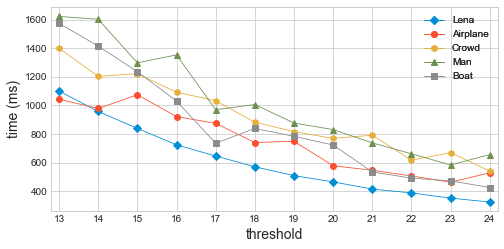

In [159]:
fig,ax = plt.subplots(figsize=(8, 4.5))

color = itertools.cycle(colors)

for key in embedder_part.keys():
    ax.plot([i for i in range(13, 25)], embedder_part[key][embedder_part[key].name.str.contains("_bench/.*/6/400/3_mean")]['real_time'], color=next(color), marker=next(marker), linewidth=0.8)

legend1 = plt.legend(
    embedder_part.keys(), loc="upper right"
)
ax.add_artist(legend1)

ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("time (ms)", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([i for i in range(13, 25)])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.2, xticks[-1]+0.2)
plt.xticks(xticks)

fig.subplots_adjust(bottom=0.25)

fig.savefig('../../../docs/images/embedder_time_T.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Embedder speed for different $\lambda$s ($T=13$, $\alpha=6$, $\lambda=...$, $u=1$)

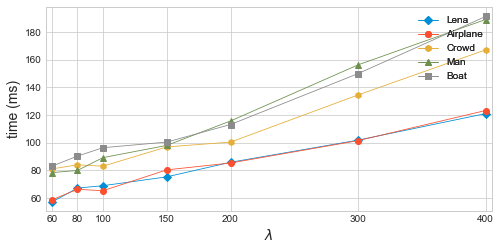

In [140]:
fig,ax = plt.subplots(figsize=(8, 4.5))

color = itertools.cycle(colors)

for key in embedder_part.keys():
    ax.plot([60, 80, 100, 150, 200, 300, 400], embedder_part[key][embedder_part[key].name.str.contains("_bench/13/6/.*/1_mean")]['real_time'], color=next(color), marker=next(marker), linewidth=0.8)

legend1 = plt.legend(
    embedder_part.keys(), loc="upper right"
)
ax.add_artist(legend1)

ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("time (ms)", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([60, 80, 100, 150, 200, 300, 400])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-5, xticks[-1]+5)
plt.xticks(xticks)

fig.subplots_adjust(bottom=0.25)

fig.savefig('../../../docs/images/embedder_time_lambda.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Relationship between the parameter T and the maximum embedding rate $t_{max}$ with default params: ($T=13,\ ...,\ 24$, $\alpha=6$, $\lambda=400$, $u=1$).

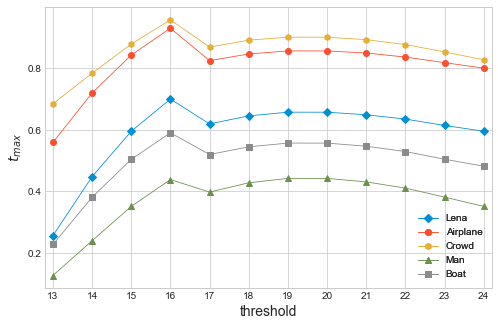

In [141]:
fig,ax = plt.subplots(figsize=(8, 6.2))

color = itertools.cycle(colors)

for key in embedder_part.keys():
    ax.plot([i for i in range(13, 25)], embedder_part[key][embedder_part[key].name.str.contains("_bench/.*/6/400/1_mean")]['MaxEmbeddingRate'], color=next(color), marker=next(marker), linewidth=0.8)

legend1 = plt.legend(
    embedder_part.keys(), loc="lower right"
)
ax.add_artist(legend1)

ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("$t_{max}$", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([i for i in range(13, 25)])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.2, xticks[-1]+0.2)
plt.xticks(xticks)

fig.subplots_adjust(bottom=0.25)

fig.savefig('../../../docs/images/embedder_tmax_T.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Relationship between the parameter $\lambda$ and the maximum embedding rate $t_{max}$. Params: ($T=13$, $\alpha=6$, $\lambda=...$, $u=1$).

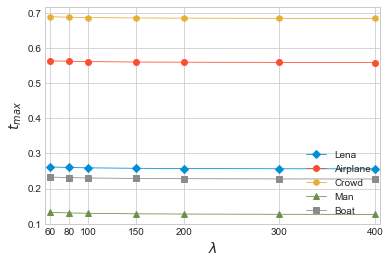

In [142]:
fig,ax = plt.subplots()
color = itertools.cycle(colors)
for key in embedder_part.keys():
    ax.plot([60, 80, 100, 150, 200, 300, 400], embedder_part[key][embedder_part[key].name.str.contains("_bench/13/5/.*/1_mean")]['MaxEmbeddingRate'], color=next(color), marker=next(marker), linewidth=0.8)

ax.legend(['Lena', 'Airplane', 'Crowd', 'Man', 'Boat'], loc ="lower right")
    
ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("$t_{max}$", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([60, 80, 100, 150, 200, 300, 400])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-5, xticks[-1]+5)
plt.xticks(xticks)

fig.savefig('../../../docs/images/embedder_tmax_lambda.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Relationship between the parameter $\alpha$ and the maximum embedding rate $t_{max}$. Params: ($T=13$, $\alpha=4,5,6$, $\lambda=400$, $u=1$).

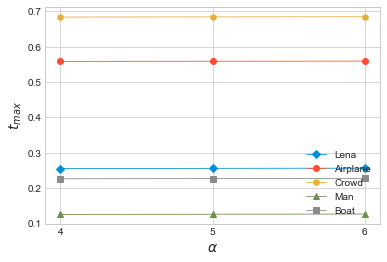

In [161]:
fig,ax = plt.subplots()
color = itertools.cycle(colors)
for key in embedder_part.keys():
    ax.plot([4, 5, 6], embedder_part[key][embedder_part[key].name.str.contains("_bench/13/.*/400/3_mean")]['MaxEmbeddingRate'], color=next(color), marker=next(marker), linewidth=0.8)

ax.legend(['Lena', 'Airplane', 'Crowd', 'Man', 'Boat'], loc ="lower right")
    
ax.set_xlabel("$\\alpha$", fontsize=14)
ax.set_ylabel("$t_{max}$", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([4, 5, 6])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.1, xticks[-1]+0.1)
plt.xticks(xticks)

fig.savefig('../../../docs/images/embedder_tmax_alpha.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Process data for extractor

In [144]:
second_part = pd.DataFrame(json.load(open('../../benchmark-results-recoverimage_recoverimageextractdata.json', 'r'))['benchmarks'])

# delete unnecessary columns
second_part.drop(
    labels=['run_type', 'repetitions', 'threads', 'run_name', 'cpu_time', 'time_unit', 'repetition_index'],
    axis=1,
    inplace=True
)
# Delete rows with medians and rows for each independent iteration
second_part = second_part[second_part['aggregate_name'].notna()]
second_part = second_part[~second_part.aggregate_name.str.contains("median")]

extractor_part = {
    'ExtractData' : first_part[first_part.name.str.contains("Extractor_ExtractData_")],
    'RecoverImage' : second_part[second_part.name.str.contains("Extractor_RecoverImage_")],
    'RecoverImageExtractData' : second_part[second_part.name.str.contains("Extractor_RecoverImageExtractData_")]
}

# extractor_part['ExtractData'].head(6)

### Plot SSIM$_d$/PSNR$_d$ against threshold. Default params: ($T=13,\ ...,\ 24$, $\alpha=6$, $\lambda=400$, $u=1$).

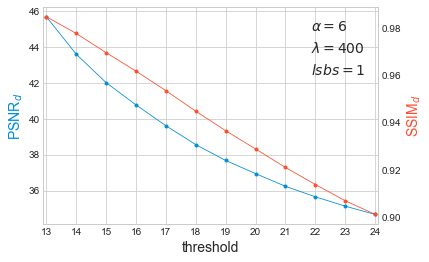

In [145]:
recover_image_threshold = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/.*/6/400/1/iterations:3_mean")]
recover_image_threshold['threshold'] = [i for i in range(13, 25)]

fig,ax = plt.subplots()
plt.xticks(recover_image_threshold.threshold)
ax.plot(recover_image_threshold.threshold, recover_image_threshold.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("PSNR$_d$", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

# Add info about used parameters
ax.legend([
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0),
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0),
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0)
], ('$\\alpha = 6$', '$\lambda = 400$', '$lsbs = 1$'), prop={'size': 14}, frameon=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.1, xticks[-1]+0.1)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_threshold.threshold, recover_image_threshold.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM$_d$", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNRd_SSIMd_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM$_d$/PSNR$_d$ against alpha. Default params: ($T=13$, $\alpha=4, 5, 6$, $\lambda=400$, $u=1$).

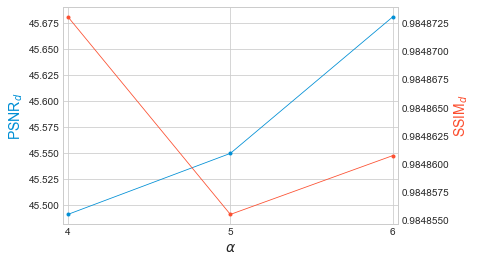

In [146]:
recover_image_alpha = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/.*/400/1/iterations:3_mean")]
recover_image_alpha['alpha'] = [4, 5, 6]

fig,ax = plt.subplots()
plt.xticks(recover_image_alpha.alpha)
ax.plot(recover_image_alpha.alpha, recover_image_alpha.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("$\\alpha$", fontsize=14)
ax.set_ylabel("PSNR$_d$", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.03, xticks[-1]+0.03)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_alpha.alpha, recover_image_alpha.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM$_d$", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNRd_SSIMd_alpha.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM$_d$/PSNR$_d$ against lamda. Default params: ($T=13$, $\alpha=6$, $\lambda=...$, $u=1$).

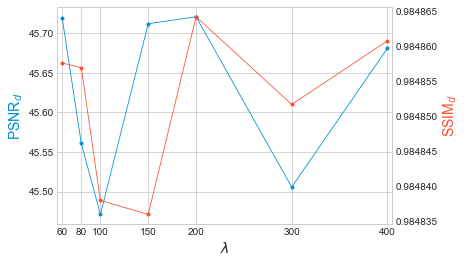

In [147]:
recover_image_lambda = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/6/.*/1/iterations:3_mean")]
recover_image_lambda['lambda'] = [60, 80, 100, 150, 200, 300, 400]

fig, ax = plt.subplots()
plt.xticks(recover_image_lambda['lambda'])
ax.plot(recover_image_lambda['lambda'], recover_image_lambda.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("PSNR$_d$", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-5, xticks[-1]+5)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_lambda['lambda'], recover_image_lambda.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM$_d$", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNRd_SSIMd_lambda.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM$_d$/PSNR$_d$ against lsb-layers. Default params: ($T=13$, $\alpha=6$, $\lambda=400$, $u=1,2,3$).

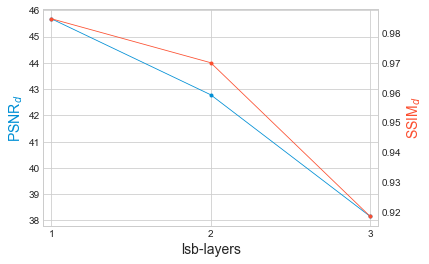

In [148]:
recover_image_lsb = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/6/400/.*/iterations:3_mean")]
recover_image_lsb['lsb'] = [1, 2, 3]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.xticks(np.arange(1, 4, 1.0))
ax.plot(recover_image_lsb['lsb'], recover_image_lsb.PSNR, color=colors[0], marker=".", linewidth=0.8)

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("lsb-layers", fontsize=14)
ax.set_ylabel("PSNR$_d$", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_lsb['lsb'], recover_image_lsb.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM$_d$", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNRd_SSIMd_lsb-layers.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM$_r$/PSNR$_r$ against threshold. Default params: ($T=13,\ ...,\ 24$, $\alpha=6$, $\lambda=400$, $u=1$).

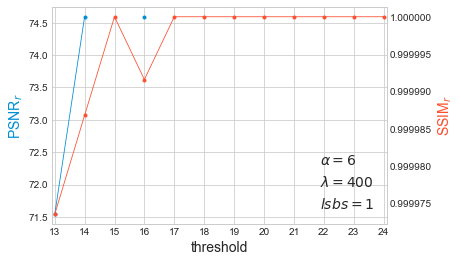

In [149]:
extracted_image_threshold = extractor_part['RecoverImageExtractData'][extractor_part['RecoverImageExtractData'].name.str.contains("_bench/.*/6/400/1/iterations:3_mean")]
extracted_image_threshold['threshold'] = [i for i in range(13, 25)]

fig,ax = plt.subplots()
plt.xticks(extracted_image_threshold.threshold)
ax.plot(extracted_image_threshold.threshold, extracted_image_threshold.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("PSNR$_r$", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

# Add info about used parameters
ax.legend([
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0),
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0),
    Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0)
], ('$\\alpha = 6$', '$\lambda = 400$', '$lsbs = 1$'), prop={'size': 14}, frameon=False, loc ="lower right")

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.1, xticks[-1]+0.1)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(extracted_image_threshold.threshold, extracted_image_threshold.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM$_r$", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNRr_SSIMr_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Data extraction speed for different Thresholds ($T=13,\ ..., \ 24$, $\alpha=6$, $\lambda=400$, $u=1$)

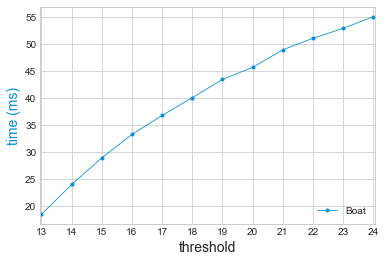

In [150]:
recover_image_threshold = extractor_part['ExtractData'][extractor_part['ExtractData'].name.str.contains("_bench/.*/6/400/1_mean")]
fig, ax = plt.subplots()
plt.xticks([i for i in range(13, 25)])
ax.plot([i for i in range(13, 25)], recover_image_threshold['real_time'], color=colors[0], marker=".", linewidth=0.8)

ax.legend(['Boat'], loc ="lower right")

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("time (ms)", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

plt.show()
fig.savefig('../../../docs/images/dataextraction_time_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Image recovery speed for different Thresholds ($T=13,\ ..., \ 24$, $\alpha=6$, $\lambda=400$, $u=1$)

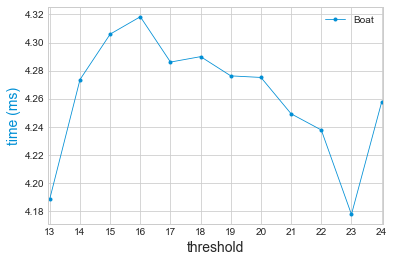

In [151]:
recover_image_threshold = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/.*/6/400/1/iterations:3_mean")]
fig, ax = plt.subplots()
plt.xticks([i for i in range(13, 25)])
ax.plot([i for i in range(13, 25)], recover_image_threshold['real_time'], color=colors[0], marker=".", linewidth=0.8)

ax.legend(['Boat'], loc ="upper right")

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("time (ms)", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

plt.show()
fig.savefig('../../../docs/images/recoverimage_time_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Data extraction and image recovery speed for different Thresholds ($T=13,\ ..., \ 24$, $\alpha=6$, $\lambda=400$, $u=1$)

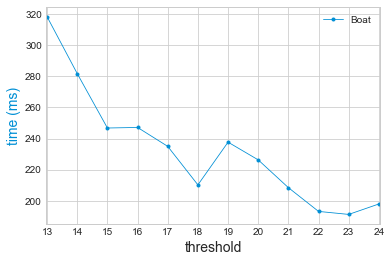

In [152]:
recover_image_threshold = extractor_part['RecoverImageExtractData'][extractor_part['RecoverImageExtractData'].name.str.contains("_bench/.*/6/400/1/iterations:3_mean")]
fig, ax = plt.subplots()
plt.xticks([i for i in range(13, 25)])
ax.plot([i for i in range(13, 25)], recover_image_threshold['real_time'], color=colors[0], marker=".", linewidth=0.8)

ax.legend(['Boat'], loc ="upper right")

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("time (ms)", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

plt.show()
fig.savefig('../../../docs/images/dataextractionimagerec_time_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Data extraction and image recovery speed for different $\alpha$s ($T=13$, $\alpha=4,5,6$, $\lambda=400$, $u=1$)

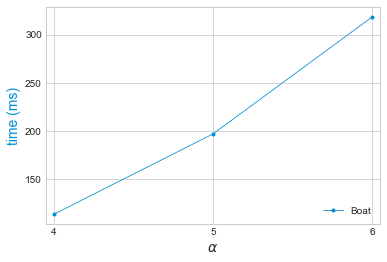

In [153]:
recover_image_threshold = extractor_part['RecoverImageExtractData'][extractor_part['RecoverImageExtractData'].name.str.contains("_bench/13/.*/400/1/iterations:3_mean")]
fig, ax = plt.subplots()
plt.xticks([4, 5, 6])
ax.plot([4, 5, 6], recover_image_threshold['real_time'], color=colors[0], marker=".", linewidth=0.8)

ax.legend(['Boat'], loc ="lower right")

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("$\\alpha$", fontsize=14)
ax.set_ylabel("time (ms)", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

plt.show()
fig.savefig('../../../docs/images/dataextractionimagerec_time_alpha.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Speed table using default params ($T=13$, $\alpha=6$, $\lambda=400$, $u=1$)

In [154]:
speed_dataframe = pd.DataFrame(index=['Airplane', 'Crowd', 'Man', 'Boat'])

# Encryptor
encryptor_speed_default = first_part[first_part.name.str.contains("Encryptor_Encrypt_.*_mean")]
encryptor_speed_default.drop(labels=['iterations', 'aggregate_name', 'MaxEmbeddingRate', 'maxUserDataBits', 'name'], axis=1, inplace=True)
encryptor_speed_default = encryptor_speed_default[:4]
speed_dataframe['Encryption (ms)'] = encryptor_speed_default['real_time'].to_list()

# Embedder
embedder_speed_default = pd.DataFrame()
embedder_speed_default = embedder_speed_default.append(
    [
        embedder_part['Airplane'][embedder_part['Airplane'].name.str.contains("_bench/13/6/400/1_mean")],
        embedder_part['Crowd'][embedder_part['Crowd'].name.str.contains("_bench/13/6/400/1_mean")],
        embedder_part['Man'][embedder_part['Man'].name.str.contains("_bench/13/6/400/1_mean")],
        embedder_part['Boat'][embedder_part['Boat'].name.str.contains("_bench/13/6/400/1_mean")]
    ],
    ignore_index=False)
embedder_speed_default.drop(labels=['iterations', 'aggregate_name', 'MaxEmbeddingRate', 'maxUserDataBits', 'name'], axis=1, inplace=True)
speed_dataframe['Embedding (ms)'] = embedder_speed_default['real_time'].to_list()

extractor_default_params = pd.DataFrame(json.load(open('../../extractor_default_params.json', 'r'))['benchmarks'])
extractor_default_params.drop(
    labels=['run_type', 'repetitions', 'threads', 'run_name', 'cpu_time', 'time_unit', 'repetition_index'],
    axis=1,
    inplace=True
)
extractor_default_params = extractor_default_params[extractor_default_params['aggregate_name'].notna()]
extractor_default_params = extractor_default_params[~extractor_default_params.aggregate_name.str.contains("median")]

# Data extraction
extractor_extractdata_speed_default = pd.DataFrame()
extractor_extractdata_speed_default = extractor_extractdata_speed_default.append(
    [
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_ExtractData_Airplane.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_ExtractData_Crowd.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_ExtractData_Man.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_ExtractData_Boat.*_mean")]
    ],
    ignore_index=False)
extractor_extractdata_speed_default.drop(labels=['iterations', 'aggregate_name', 'PSNR', 'SSIM', 'name'], axis=1, inplace=True)
speed_dataframe['DataExtraction (ms)'] = extractor_extractdata_speed_default['real_time'].to_list()

# Image recovery
extractor_recoverimage_speed_default = pd.DataFrame()
extractor_recoverimage_speed_default = extractor_recoverimage_speed_default.append(
    [
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImage_Airplane.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImage_Crowd.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImage_Man.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImage_Boat.*_mean")]
    ],
    ignore_index=False)
extractor_recoverimage_speed_default.drop(labels=['iterations', 'aggregate_name', 'PSNR', 'SSIM', 'name'], axis=1, inplace=True)
speed_dataframe['ImageRecovery (ms)'] = extractor_recoverimage_speed_default['real_time'].to_list()

# Image restoration data recovery
extractor_recoverimage_extractdata_speed_default = pd.DataFrame()
extractor_recoverimage_extractdata_speed_default = extractor_recoverimage_extractdata_speed_default.append(
    [
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImageExtractData_Airplane.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImageExtractData_Crowd.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImageExtractData_Man.*_mean")],
        extractor_default_params[extractor_default_params.name.str.contains("Extractor_RecoverImageExtractData_Boat.*_mean")]
    ],
    ignore_index=False)
extractor_recoverimage_extractdata_speed_default.drop(labels=['iterations', 'aggregate_name', 'PSNR', 'SSIM', 'name'], axis=1, inplace=True)
speed_dataframe['ImageRecoveryDataExtraction (ms)'] = extractor_recoverimage_extractdata_speed_default['real_time'].to_list()
speed_dataframe.head()

,Encryption (ms),Embedding (ms),DataExtraction (ms),ImageRecovery (ms),ImageRecoveryDataExtraction (ms)
Airplane,3.174592,123.295456,30.512633,4.441186,219.904861
Crowd,3.012347,167.169883,27.980743,4.144672,235.111653
Man,2.970965,189.132767,16.839946,3.996662,316.393778
Boat,2.968447,191.340525,22.057593,4.112542,294.266150
